# Problem :
# Question and problem definition

Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
FA titanic data. Perform Classification on the attached data using all the possible algorithms. Perform cross validation to narrow down to the best model. On that best model evaluate it using precision and recall scores

In [1]:
# lets import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check the shape, column and description of the data set
titanic.shape

(891, 12)

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Interpretation:
* the age group that was on titanic ship was on an average 42 to 80.



In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
# EDA: lets find the null values:

In [9]:
titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#.For age column lets put the mean of age and hence it will be filling from the description data mean =29.699118
titanic['Age']= titanic['Age'].fillna(np.mean(titanic['Age']))


In [11]:
# lets check the null value if null remains
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic['Age'].isna().sum()

0

In [13]:
titanic['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

Interpretation: we can see that the null values have been filled with the mean values

In [14]:
# Lets do for Embrked, filled with the mean value= 
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
# lets fill the null value in the cabin with zero
titanic['Cabin']= titanic['Cabin'].fillna(0)


In [16]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

# Assumption from the above datset:
Before going ahead for data preprocessing, we have further concluded some assumption based on data cleaning and description of our titanic:
* # colinearity:
*  we have seen that cabin can droped as it contains 687 null values which indicates that it doesnot have passengers inside which can impact our model accuracy, hence we can drop it.
 * Name column  again has unique features whic can impact a regularization of overfitting or laziness in the model for prediction.
 * Ticket column also we can drop as it has alot of duplicate data of ranges and further it can be biased with our survival of passengers as the model prediction.
 * PassengerID can also be dropped as it doesnot impact the survival of passengers.

In [17]:
# dropping for final data set before training and testing for model prediction
final_data =titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [18]:
final_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Interpretation:Now our data set is ready for training and testing the survival chekc of the passengers.

In [19]:
#Lets Do the exploratory Data Analysis. 
#lets use preprocessing label encoder to convert the categorical into numerical data of column Sex and Embarked

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
le=LabelEncoder()

In [21]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
final_data['Sex']= le.fit_transform(final_data['Sex'])

In [24]:
final_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [25]:
final_data['Embarked']= le.fit_transform(final_data['Embarked'])

In [26]:
final_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [27]:
final_data['Embarked'].unique()

array([2, 0, 1, 3])

In [28]:
final_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
# lets check he correlation between pclass and survived.
final_data[['Pclass','Survived']].groupby(['Pclass'],as_index= False).mean().sort_values(by='Survived',ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Interpretation: we can see that 62% first class passengers survived, second class =47% and more brutal impact on the third class =24% who survived.

In [30]:
#Similarly lets check for gender  and survival factors
final_data[['Sex','Survived']].groupby(['Sex'],as_index= False).mean().sort_values(by='Survived',ascending=False)


,Sex,Survived
0,0,0.742038
1,1,0.188908


Interpretation: male =74% and females=18% who survived in the targic titanic collapsed.

# Analyze by visualizing the data

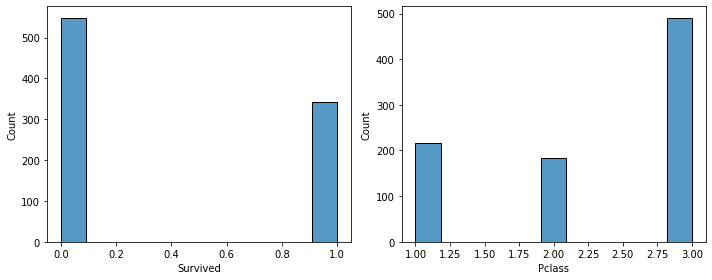

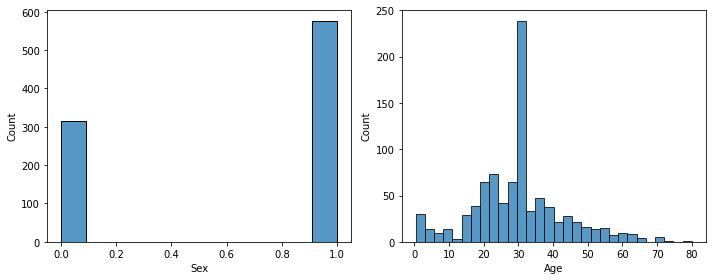

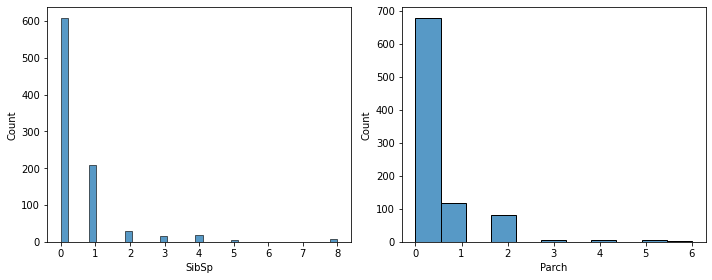

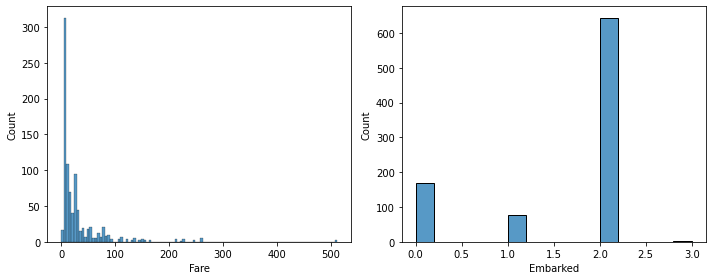

In [31]:
import seaborn as sns

num_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare','Embarked']

for i in range(0,len(num_cols),2):
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.histplot(final_data[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.histplot(final_data[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

Interpretation:
The survival rates in each  category 
* Survived :300 above passenger survived 
* Age:survival rate was pretty more in the range between 30-40
* Pclass: first class passengers survived in higher range as compared to third class passengers
* Fare: who has given more fare has higher chances of priority survival
* Embarked:S has higher chances of survival 
* Sex:Make survives more as compared to female.

            

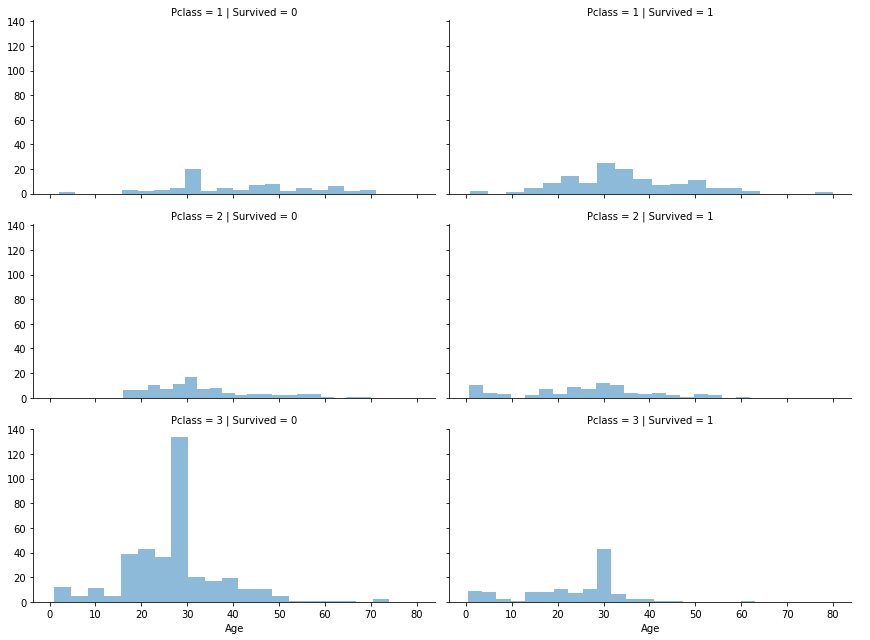

In [32]:
#Lets try depth of visualization of passengers in class and survival of passenger
grid_titanic =sns.FacetGrid(titanic,col='Survived',row='Pclass',aspect=2)
grid_titanic.map(plt.hist, 'Age', alpha=.5, bins=20)
grid_titanic.add_legend();

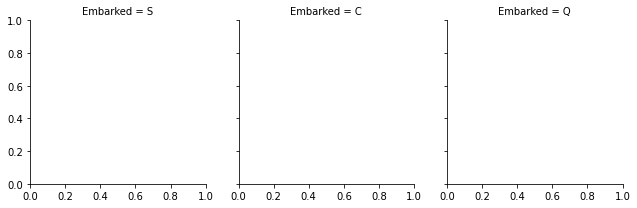

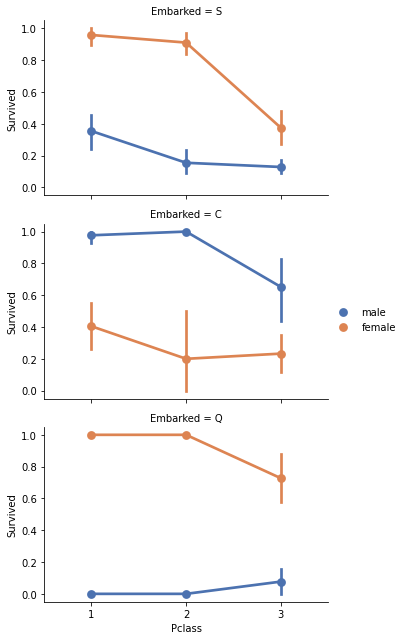

In [33]:
grid_embarked = sns.FacetGrid(titanic, col='Embarked')
grid_embarked = sns.FacetGrid(titanic, row='Embarked', aspect=1.6)
grid_embarked.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid_embarked.add_legend()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f037e94e020>,
 'caps': [<matplotlib.lines.Line2D at 0x7f037e94e440>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f037e94dd80>,
 'medians': [<matplotlib.lines.Line2D at 0x7f037e94e980>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f037e94ebc0>,
 'means': []}

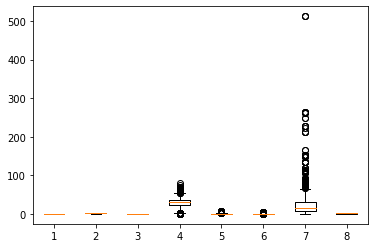

In [34]:
plt.boxplot(final_data)

In [59]:
# lets import machine learning models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB ,BernoulliNB,ComplementNB,CategoricalNB,MultinomialNB
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report, f1_score,accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import StandardScaler


In [36]:
final_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
x= final_data.drop('Survived',axis=1)
y= final_data['Survived']

In [38]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [39]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
# lets split the data in train ans test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [41]:
print("the x_train shape", x_train.shape)
print("the y_train shape", y_train.shape)

print("the x_test shape", x_test.shape)
print("the y_test shape", y_test.shape)

the x_train shape (623, 7)
the y_train shape (623,)
the x_test shape (268, 7)
the y_test shape (268,)


In [42]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [43]:
sc= StandardScaler()

In [44]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [45]:

classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [46]:
y_pred = classifier.predict(x_test)

In [47]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)


[[128  28]
 [ 37  75]]
Accuracy score: 0.7574626865671642


with the help of logisticRegression the accuracy socre is 76%

<AxesSubplot: >

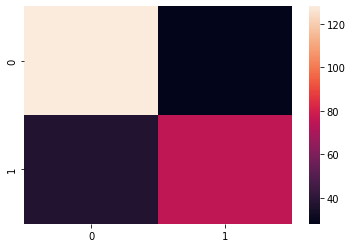

In [48]:
# plot the heatmap
sns.heatmap(cm)

In [57]:
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM using rbf', SVC(kernel = 'rbf',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree', DecisionTreeClassifier(criterion = "entropy")))
classification_models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))


In [58]:
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
  result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 79.24% - SD Accuracy = 4.24%
K Nearest Neighbor: Mean Accuracy = 70.25% - SD Accuracy = 6.20%
Kernel SVM using rbf: Mean Accuracy = 67.44% - SD Accuracy = 5.70%
Naive Bayes: Mean Accuracy = 78.56% - SD Accuracy = 4.40%
Decision Tree: Mean Accuracy = 78.57% - SD Accuracy = 3.49%
Random Forest: Mean Accuracy = 81.60% - SD Accuracy = 5.96%


In [54]:
# lets try again for kernel:kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} 
# decision tree creterion:{gini,logloss}
classification_models = []
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))
classification_models.append(('K Nearest Neighbor', KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)))
classification_models.append(('Kernel SVM using poly', SVC(kernel = 'poly',gamma='scale')))
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Decision Tree using Gini', DecisionTreeClassifier(criterion = "gini")))
classification_models.append(('Decision Tree using LogLoss', DecisionTreeClassifier(criterion = "log_loss")))
classification_models.append(('Random Forest using Gini', RandomForestClassifier(n_estimators=100, criterion="gini")))
classification_models.append(('Random Forest using LogLoss', RandomForestClassifier(n_estimators=100, criterion="log_loss")))





In [55]:
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
  result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Logistic Regression: Mean Accuracy = 79.24% - SD Accuracy = 4.24%
K Nearest Neighbor: Mean Accuracy = 70.25% - SD Accuracy = 6.20%
Kernel SVM using poly: Mean Accuracy = 64.53% - SD Accuracy = 6.43%
Naive Bayes: Mean Accuracy = 78.56% - SD Accuracy = 4.40%
Decision Tree using Gini: Mean Accuracy = 77.67% - SD Accuracy = 4.33%
Decision Tree using LogLoss: Mean Accuracy = 79.12% - SD Accuracy = 3.12%
Random Forest using Gini: Mean Accuracy = 80.92% - SD Accuracy = 5.32%
Random Forest using LogLoss: Mean Accuracy = 81.37% - SD Accuracy = 5.66%


In [60]:
classification_models = []
classification_models.append(('Naive Bayes', GaussianNB()))
classification_models.append(('Naive Bayes', BernoulliNB()))
classification_models.append(('Naive Bayes', ComplementNB()))
classification_models.append(('Naive Bayes', ComplementNB()))
classification_models.append(('Naive Bayes', CategoricalNB()))
classification_models.append(('Naive Bayes', MultinomialNB()))


In [61]:
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=(7), shuffle=(True))
  result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))

Naive Bayes: Mean Accuracy = 78.56% - SD Accuracy = 4.40%
Naive Bayes: Mean Accuracy = 78.68% - SD Accuracy = 4.37%
Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%
Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%
Naive Bayes: Mean Accuracy = nan% - SD Accuracy = nan%
Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%


# Observation:
* Logistic Regression: Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. (Reference Wikipedia.)

* Logistic Regression: Mean Accuracy = 79.24% - SD Accuracy = 4.24%
* K Nearest Neighbour: In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.


* K Nearest Neighbor: Mean Accuracy = 70.25% - SD Accuracy = 6.20%
* SVM: we model using Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.


* Kernel SVM using rbf: Mean Accuracy = 67.44% - SD Accuracy = 5.70%
* Kernel SVM using poly: Mean Accuracy = 64.53% - SD Accuracy = 6.43%
* Decision Tree Classifier: This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.


* Decision Tree: Mean Accuracy = 78.57% - SD Accuracy = 3.49%
* Decision Tree using Gini: Mean Accuracy = 77.67% - SD Accuracy = 4.33%
* Decision Tree using LogLoss: Mean Accuracy = 79.12% - SD Accuracy = 3.12%
* Random Forest Tree Classifier: The next model Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.


* Random Forest using Gini: Mean Accuracy = 80.92% - SD Accuracy = 5.32%
* Random Forest using LogLoss: Mean Accuracy = 81.37% - SD Accuracy = 5.66%
* Random Forest: Mean Accuracy = 81.60% - SD Accuracy = 5.96%
* Navie Bayes: In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. (Reference Wikipedia.)


* Naive Bayes: Mean Accuracy = 78.56% - SD Accuracy = 4.40%
* Naive Bayes: Mean Accuracy = 78.68% - SD Accuracy = 4.37%
* Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%
* Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%
* Naive Bayes: Mean Accuracy = nan% - SD Accuracy = nan%
* Naive Bayes: Mean Accuracy = 68.68% - SD Accuracy = 4.70%



# Conclusion: 
* KNeighbour classifier works well as compared to svc and but was worst than  logistic regression.
* amongst decision tree and random forest, for this dataset random forest works pretty great here with an accuracy 81%
* Naive bayes works moderately here as accuracy ranges as compared to random forest and logistic regression is very less.

## Hence for titanic survival dataset random forest, logisitc regression and decision tree classifier. 


-Zeba Khan 